<a href="https://colab.research.google.com/github/yagnesh16697/data-science-and-ml/blob/master/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
fandango = pd.read_csv('sample_data/fandango_scrape.csv')

In [5]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Relationship between rating and popularity of movies

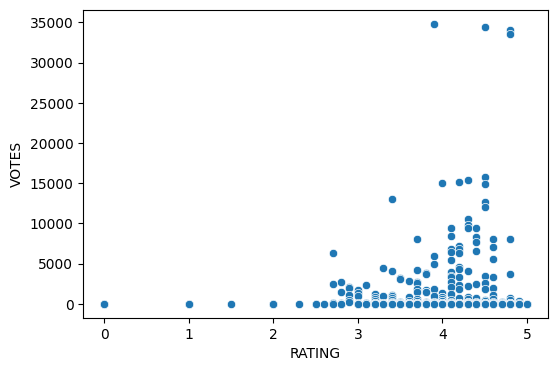

In [7]:
plt.figure(figsize=(6,4),dpi=100)
sns.scatterplot(data=fandango, y="VOTES", x="RATING");

### Correlation between cols

In [8]:
fandango.corr()

<ipython-input-8-b65df3b6d08c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [9]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [13]:
fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

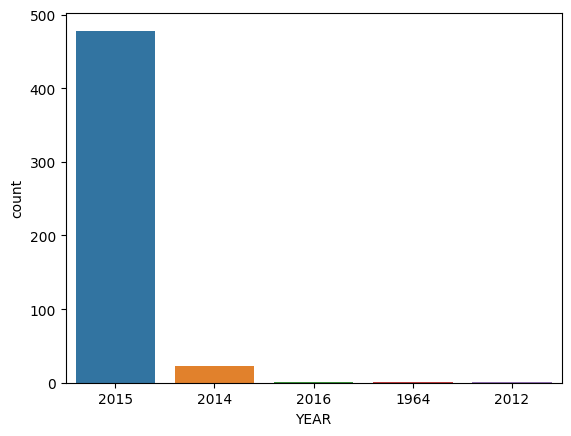

In [15]:
sns.countplot(data=fandango, x="YEAR");

In [18]:
fan_reviewed = fandango[fandango["VOTES"]>0]

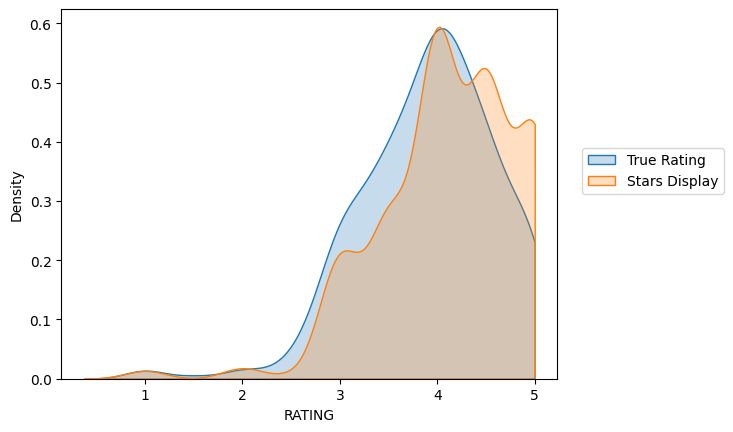

In [24]:
sns.kdeplot(data=fan_reviewed,x="RATING",clip=[0,5],fill =True,label="True Rating");
sns.kdeplot(data=fan_reviewed,x="STARS",clip=[0,5],fill =True,label="Stars Display");
plt.legend(loc=(1.05,0.5));

In [30]:
fan_reviewed["STARS_DIFF"] = (fan_reviewed["STARS"] - fan_reviewed["RATING"]).round(2)

<ipython-input-30-8814f265d460>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed["STARS_DIFF"] = (fan_reviewed["STARS"] - fan_reviewed["RATING"]).round(2)


In [31]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


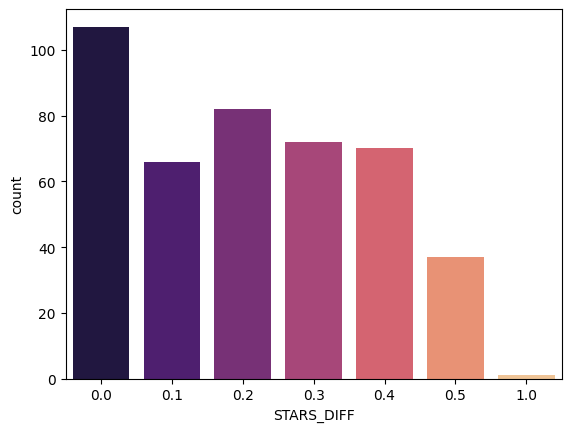

In [35]:
sns.countplot(data=fan_reviewed,x="STARS_DIFF",palette="magma");

In [37]:
all_sites = pd.read_csv("sample_data/all_sites_scores.csv")

In [38]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


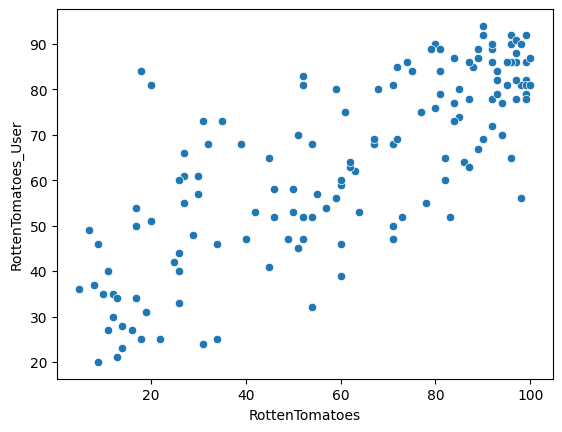

In [40]:
sns.scatterplot(data=all_sites,x="RottenTomatoes",y="RottenTomatoes_User");

In [41]:
all_sites["RottenTomatoes_Diff"] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]
all_sites["RottenTomatoes_Diff"].apply(abs).mean()

15.095890410958905

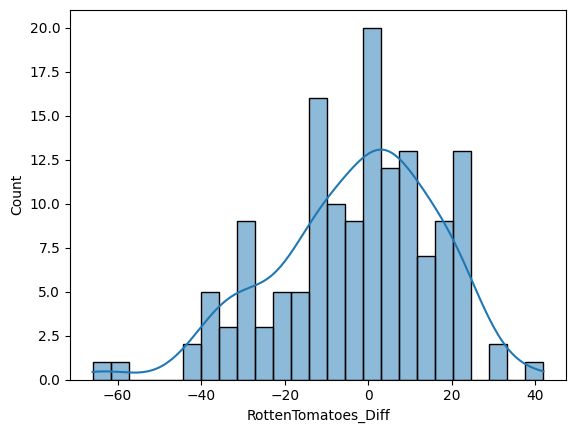

In [45]:
sns.histplot(data=all_sites,x="RottenTomatoes_Diff",kde=True,bins=25);

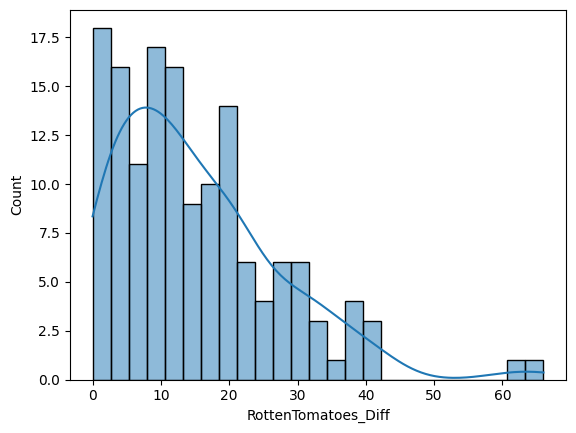

In [49]:
sns.histplot(data=all_sites,x=all_sites["RottenTomatoes_Diff"].apply(abs),kde=True,bins=25);

In [50]:
all_sites.nlargest(5,"RottenTomatoes_Diff")["FILM"]

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

In [51]:
all_sites.nsmallest(5,"RottenTomatoes_Diff")["FILM"]

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

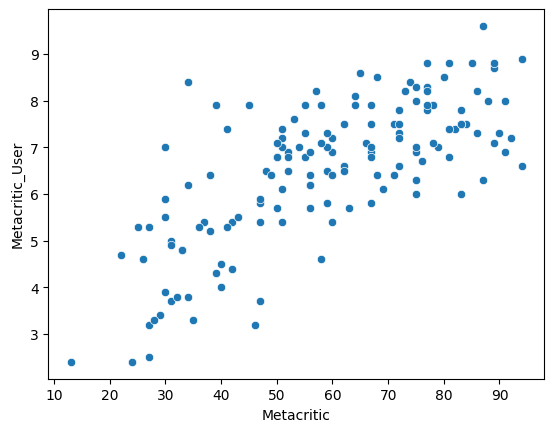

In [52]:
sns.scatterplot(data=all_sites,x="Metacritic",y="Metacritic_User");

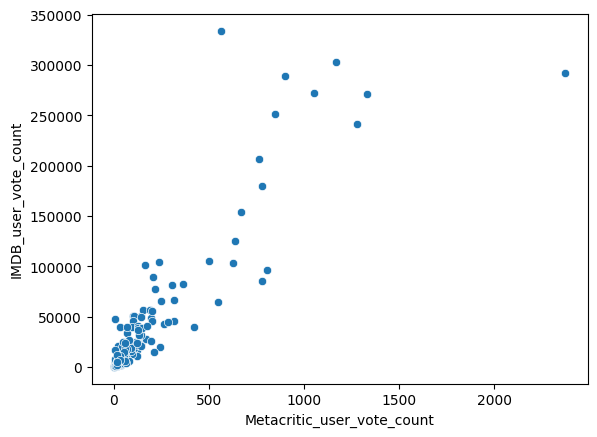

In [54]:
sns.scatterplot(data=all_sites,x="Metacritic_user_vote_count",y="IMDB_user_vote_count");

In [55]:
all_sites.nlargest(1,"IMDB_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [56]:
all_sites.nlargest(1,"Metacritic_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [58]:
df = pd.merge(fandango,all_sites,on="FILM",how="inner")
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [61]:
df["RT_Norm"] = np.round(df["RottenTomatoes"]/20,1)
df["RTU_Norm"] = np.round(df["RottenTomatoes"]/20,1)

In [62]:
df["Meta_norm"] = np.round(df["Metacritic"]/20,1)
df["Meta_U_norm"] = np.round(df["Metacritic"]/2,1)

In [63]:
df["IMDB_Norm"] = np.round(df["IMDB"]/2,1)

In [65]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'RottenTomatoes_Diff', 'RT_Norm', 'RTU_Norm', 'Meta_norm',
       'Meta_U_norm', 'IMDB_Norm'],
      dtype='object')

In [70]:
norm_scores = df[["STARS","RATING","RT_Norm","RTU_Norm","RTU_Norm","Meta_norm","Meta_norm","IMDB_Norm"]]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,RTU_Norm,Meta_norm,Meta_norm,IMDB_Norm
0,4.0,3.9,1.2,1.2,1.2,2.3,2.3,2.1
1,4.5,4.5,3.6,3.6,3.6,3.0,3.0,3.6
2,5.0,4.8,3.6,3.6,3.6,3.6,3.6,3.7
3,5.0,4.8,4.0,4.0,4.0,3.4,3.4,3.7
4,4.5,4.5,4.9,4.9,4.9,4.7,4.7,4.3


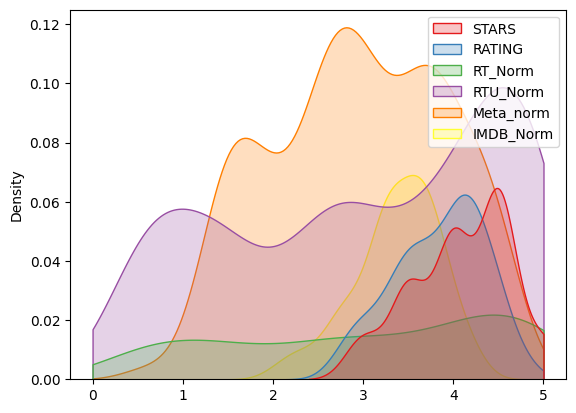

In [77]:
sns.kdeplot(data=norm_scores,fill=True,clip=[0,5],palette="Set1");

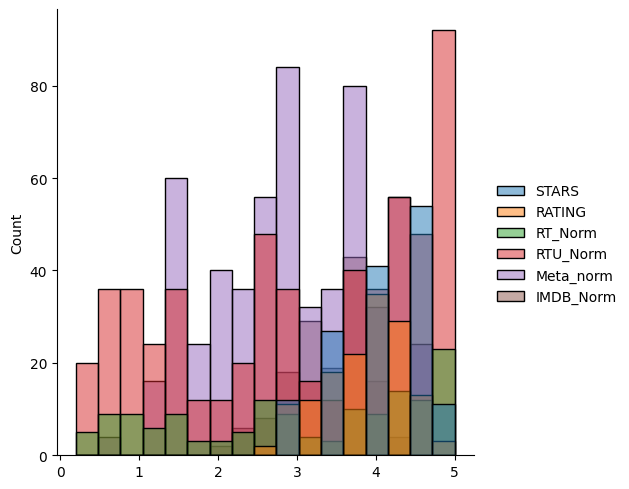

In [74]:
sns.displot(data=norm_scores);

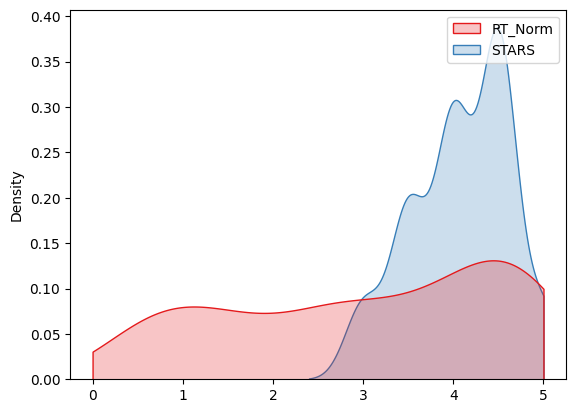

In [80]:
sns.kdeplot(data=norm_scores[["RT_Norm","STARS"]],fill=True,clip=[0,5],palette="Set1");

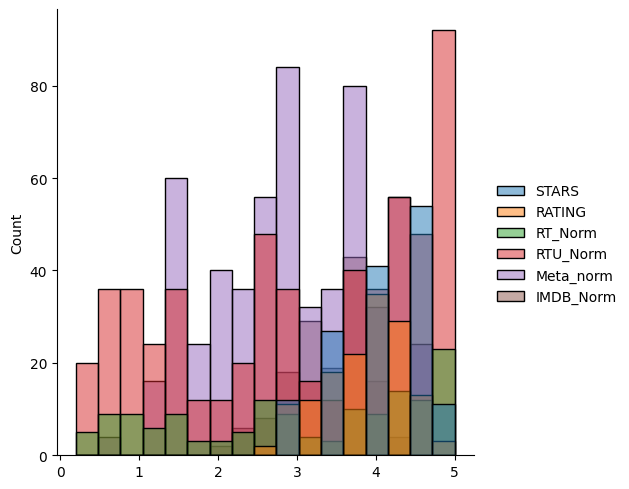

In [82]:
sns.displot(data=norm_scores);